In [90]:
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [91]:
iris=load_iris()

In [92]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [93]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(iris.data)

KMeans(n_clusters=3, n_init=10)

In [94]:
identified_clusters = kmeans.fit_predict(iris.data)
print(identified_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


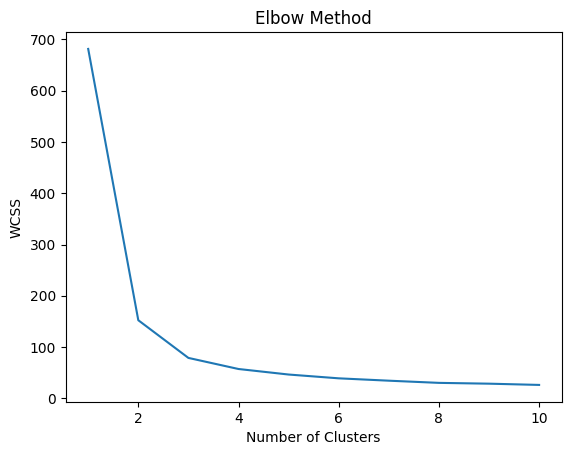

In [95]:
distance = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(iris.data)
    distance_iter = kmeans.inertia_
    distance.append(distance_iter)
number_clusters = range(1,11)
plt.plot(number_clusters,distance)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
mnist = fetch_openml('mnist_784', version=1)

In [97]:
X = mnist.data
y = mnist.target

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [99]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
start_time = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)
time_before = time.time() - start_time

In [101]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [102]:
start_time = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred)
time_after = time.time() - start_time

In [103]:
print('Accuracy before:' , f"{accuracy_before * 100:.2f}%")
print('Accuracy after:' , f"{accuracy_after * 100:.2f}%")
print('Time before:' , f"{time_before:.2f}s")
print('Time after:' , f"{time_after:.2f}s")

Accuracy before: 91.39%
Accuracy after: 92.14%
Time before: 31.10s
Time after: 12.95s
